# 3. Modeling

## Table of Contents:
- [Imports](#Imports)

- [Loading Data (2 sets)](#Loading-Data-(2-sets))
- [Baseline Score](#Baseline-Score)
- [Features & Target](#Features-&-Target)
- [Train Test Split](#Train-Test-Split)
- [Classification Models & Ensembles Methods](#Classification-Models-&-Ensembles-Methods)
    - [Decision Tree Classifier](#Decision-Tree-Classifier)
    - [Bagged Decision Trees](#Bagged-Decision-Trees)
    - [Random Forest Trees](#Random-Forest-Trees)
    - [AdaBoost](#AdaBoost)
    - [XGBoost](#XGBoost)
- [Model Evaluations](#Model-Evaluations)
    - [Combo based dataset Accuracy Scores](#Combo-based-dataset-Accuracy-Scores)
    - [Champion based dataset  Accuracy Scores](#Champion-based-dataset-Accuracy-Scores)    
    - [Important Features](#Important-Features)        
- [Optimization using GridSearchCV](#Optimization-using-GridSearchCV)      
- [Conclusion](#Conclusion)  
    


## Imports

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics


### Loading Data (2 sets)

In [2]:
# We will load only the filtered dataframes as the original master_dataframe has even more collinearity and cannot perform any better
combo_df = pd.read_csv('../datasets/combo_filtered_game_df.csv', index_col = 0)
champion_df = pd.read_csv('../datasets/champion_filtered_game_df.csv', index_col = 0)

combo_df.columns

Index(['placement', 'Berserker_1', 'Celestial_1', 'Crystal_1', 'Desert_1',
       'Druid_1', 'Electric_1', 'Inferno_1', 'Light_1', 'Mage_1', 'Metal_1',
       'Mountain_1', 'Mystic_1', 'Ocean_1', 'Poison_1', 'Predator_1',
       'Assassin_1', 'Blademaster_1', 'Glacial_1', 'Ranger_1', 'Shadow_1',
       'Soulbound_1', 'Summoner_1', 'Warden_1', 'Wind_1', 'Woodland_1',
       'Berserker_2', 'Crystal_2', 'Desert_2', 'Electric_2', 'Inferno_2',
       'Light_2', 'Mage_2', 'Metal_2', 'Mystic_2', 'Ocean_2', 'Assassin_2',
       'Blademaster_2', 'Glacial_2', 'Ranger_2', 'Shadow_2', 'Summoner_2',
       'Warden_2', 'Wind_2', 'Woodland_2', 'Electric_3', 'Inferno_3',
       'Light_3', 'Metal_3', 'Ocean_3', 'Blademaster_3', 'Glacial_3',
       'Ranger_3', 'Warden_3', 'Wind_3'],
      dtype='object')

### Baseline Score

In oder to calculate our baseline score, we will first take a look at our distribution of 'placement' classes. We will take a look at both the combo and champion filtered data since we will be running our model on both datasets.

#### combo_df 

(array([627., 676., 599., 585., 649., 696., 676., 768.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

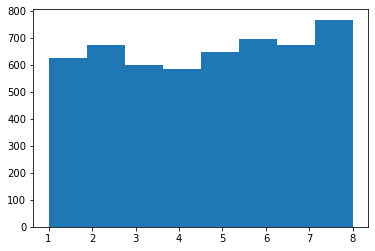

In [3]:
plt.hist(combo_df.placement, bins= combo_df.placement.max())

#### champion_df

(array([627., 676., 599., 585., 649., 696., 676., 768.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

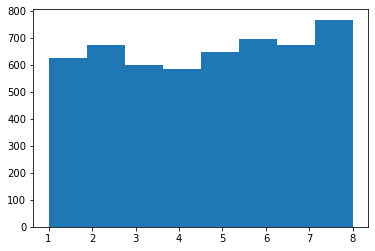

In [4]:
plt.hist(champion_df.placement, bins= combo_df.placement.max())

If our data was evenly distributed for all placements, we would take our baseline model score as 1/ $k$ where $k$ is defined as the number of classes.  However, we notice that the distribution is actually not even so we will take the percentage of our most apparent class and use that as our **baseline score.**

In [5]:
combo_df['placement'].value_counts(normalize=True)

8    0.145565
6    0.131918
7    0.128127
2    0.128127
5    0.123010
1    0.118840
3    0.113533
4    0.110879
Name: placement, dtype: float64

It makes sense that the distribution of the two different datasets have the same baseline score of **0.146** because they were derived from the same original dataframe where the number of rows stay the same between the two dataframe.

### Features & Target

In [6]:
# features
X_combo = combo_df.drop(['placement'], axis=1)
X_champ = champion_df.drop(['placement'], axis=1)

# targets , since both dataframes are derived from a single dataframe with just different features, we can use the same y
y = combo_df['placement']

### Train Test Split

In [7]:
X_train_combo, X_test_combo, y_train_combo, y_test_combo = train_test_split(X_combo, y, 
                                                                            stratify=y,
                                                                            random_state = 42)

X_train_champ, X_test_champ, y_train_champ, y_test_champ = train_test_split(X_champ, y, 
                                                                            stratify=y,
                                                                            random_state = 42)

In [36]:
# checking the shape of the newly created train and test set
print(X_train_combo.shape)
print(X_test_combo.shape)
print(y_train_combo.shape)
print(y_test_combo.shape)

(3957, 54)
(1319, 54)
(3957,)
(1319,)


## Classification Models & Ensembles Methods

### Decision Tree Classifier

#### Combo based dataset

In [9]:
dtc_combo = DecisionTreeClassifier()
dtc_combo.fit(X_train_combo, y_train_combo)

print(f'Decision Tree Train Score: {dtc_combo.score(X_train_combo, y_train_combo)}')
print(f'Decision Tree Test Score: {dtc_combo.score(X_test_combo, y_test_combo)}')

Decision Tree Train Score: 0.6244629770027799
Decision Tree Test Score: 0.177407126611069


#### Champion based dataset

In [10]:
dtc_champ = DecisionTreeClassifier()
dtc_champ.fit(X_train_champ, y_train_champ)

print(f'Decision Tree Train Score: {dtc_champ.score(X_train_champ, y_train_champ)}')
print(f'Decision Tree Test Score: {dtc_champ.score(X_test_champ, y_test_champ)}')

Decision Tree Train Score: 0.9724538792014152
Decision Tree Test Score: 0.20773313115996966


### Bagged Decision Trees

#### Combo based dataset

In [11]:
bdc_combo = BaggingClassifier()
bdc_combo.fit(X_train_combo, y_train_combo)

print(f'Bagged Decision Tree Train Score: {bdc_combo.score(X_train_combo, y_train_combo)}')
print(f'Bagged Decision Tree Test Score: {bdc_combo.score(X_test_combo, y_test_combo)}')

Bagged Decision Tree Train Score: 0.6103108415466262
Bagged Decision Tree Test Score: 0.17589082638362397


#### Champion based dataset

In [12]:
bdc_champ = BaggingClassifier()
bdc_champ.fit(X_train_champ, y_train_champ)

print(f'Bagged Decision Tree Train Score: {bdc_champ.score(X_train_champ, y_train_champ)}')
print(f'Bagged Decision Tree Test Score: {bdc_champ.score(X_test_champ, y_test_champ)}')

Bagged Decision Tree Train Score: 0.9583017437452616
Bagged Decision Tree Test Score: 0.21228203184230476


### Random Forest Trees

#### Combo based dataset

In [13]:
rfc_combo = RandomForestClassifier()
rfc_combo.fit(X_train_combo, y_train_combo)

print(f'Random Forest Tree Train Score: {rfc_combo.score(X_train_combo, y_train_combo)}')
print(f'Random Forest Tree Test Score: {rfc_combo.score(X_test_combo, y_test_combo)}')

Random Forest Tree Train Score: 0.6244629770027799
Random Forest Tree Test Score: 0.18347232752084913


#### Champion based dataset

In [14]:
rfc_champ = RandomForestClassifier()
rfc_champ.fit(X_train_champ, y_train_champ)

print(f'Random Forest Tree Train Score: {rfc_champ.score(X_train_champ, y_train_champ)}')
print(f'Random Forest Tree Test Score: {rfc_champ.score(X_test_champ, y_test_champ)}')

Random Forest Tree Train Score: 0.9724538792014152
Random Forest Tree Test Score: 0.2441243366186505


### AdaBoost

#### Combo based dataset

In [15]:
ada_combo = AdaBoostClassifier()
ada_combo.fit(X_train_combo, y_train_combo)

print(f'AdaBoost Train Score: {ada_combo.score(X_train_combo, y_train_combo)}')
print(f'AdaBoost Test Score: {ada_combo.score(X_test_combo, y_test_combo)}')

AdaBoost Train Score: 0.26105635582512005
AdaBoost Test Score: 0.2100075815011372


#### Champion based dataset

In [16]:
ada_champ = AdaBoostClassifier()
ada_champ.fit(X_train_champ, y_train_champ)

print(f'AdaBoost Train Score: {ada_champ.score(X_train_champ, y_train_champ)}')
print(f'AdaBoost Test Score: {ada_champ.score(X_test_champ, y_test_champ)}')

AdaBoost Train Score: 0.3025018953752843
AdaBoost Test Score: 0.2676269901440485


### XGBoost

#### Combo based dataset

In [17]:
xgb_combo = XGBClassifier()
xgb_combo.fit(X_train_combo, y_train_combo)

print(f'XGBoost Train Score: {xgb_combo.score(X_train_combo, y_train_combo)}')
print(f'XGBoost Test Score: {xgb_combo.score(X_test_combo, y_test_combo)}')

XGBoost Train Score: 0.4763709881223149
XGBoost Test Score: 0.20242608036391205


#### Champion based dataset

In [18]:
xgb_champ = XGBClassifier()
xgb_champ.fit(X_train_champ, y_train_champ)

print(f'XGBoost Train Score: {xgb_champ.score(X_train_champ, y_train_champ)}')
print(f'XGBoost Test Score: {xgb_champ.score(X_test_champ, y_test_champ)}')

XGBoost Train Score: 0.7306039929239323
XGBoost Test Score: 0.2532221379833207


## Model Evaluation

### Combo based dataset Accuracy Scores

In [19]:
print(f'Decision Tree Train Score: {dtc_combo.score(X_train_combo, y_train_combo)}')
print(f'Decision Tree Test Score: {dtc_combo.score(X_test_combo, y_test_combo)}')
print('---------------------------------------------')
print(f'Bagged Decision Tree Train Score: {bdc_combo.score(X_train_combo, y_train_combo)}')
print(f'Bagged Decision Tree Test Score: {bdc_combo.score(X_test_combo, y_test_combo)}')
print('---------------------------------------------')
print(f'Random Forest Tree Train Score: {rfc_combo.score(X_train_combo, y_train_combo)}')
print(f'Random Forest Tree Test Score: {rfc_combo.score(X_test_combo, y_test_combo)}')
print('---------------------------------------------')
print(f'AdaBoost Train Score: {ada_combo.score(X_train_combo, y_train_combo)}')
print(f'AdaBoost Test Score: {ada_combo.score(X_test_combo, y_test_combo)}')
print('---------------------------------------------')
print(f'XGBoost Train Score: {xgb_combo.score(X_train_combo, y_train_combo)}')
print(f'XGBoost Test Score: {xgb_combo.score(X_test_combo, y_test_combo)}')
print('---------------------------------------------')

Decision Tree Train Score: 0.6244629770027799
Decision Tree Test Score: 0.177407126611069
---------------------------------------------
Bagged Decision Tree Train Score: 0.6103108415466262
Bagged Decision Tree Test Score: 0.17589082638362397
---------------------------------------------
Random Forest Tree Train Score: 0.6244629770027799
Random Forest Tree Test Score: 0.18347232752084913
---------------------------------------------
AdaBoost Train Score: 0.26105635582512005
AdaBoost Test Score: 0.2100075815011372
---------------------------------------------
XGBoost Train Score: 0.4763709881223149
XGBoost Test Score: 0.20242608036391205
---------------------------------------------


### Champion based dataset Accuracy Scores

In [20]:
print(f'Decision Tree Train Score: {dtc_champ.score(X_train_champ, y_train_champ)}')
print(f'Decision Tree Test Score: {dtc_champ.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')
print(f'Bagged Decision Tree Train Score: {bdc_champ.score(X_train_champ, y_train_champ)}')
print(f'Bagged Decision Tree Test Score: {bdc_champ.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')
print(f'Random Forest Tree Train Score: {rfc_champ.score(X_train_champ, y_train_champ)}')
print(f'Random Forest Tree Test Score: {rfc_champ.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')
print(f'AdaBoost Train Score: {ada_champ.score(X_train_champ, y_train_champ)}')
print(f'AdaBoost Test Score: {ada_champ.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')
print(f'XGBoost Train Score: {xgb_champ.score(X_train_champ, y_train_champ)}')
print(f'XGBoost Test Score: {xgb_champ.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')


Decision Tree Train Score: 0.9724538792014152
Decision Tree Test Score: 0.20773313115996966
---------------------------------------------
Bagged Decision Tree Train Score: 0.9583017437452616
Bagged Decision Tree Test Score: 0.21228203184230476
---------------------------------------------
Random Forest Tree Train Score: 0.9724538792014152
Random Forest Tree Test Score: 0.2441243366186505
---------------------------------------------
AdaBoost Train Score: 0.3025018953752843
AdaBoost Test Score: 0.2676269901440485
---------------------------------------------
XGBoost Train Score: 0.7306039929239323
XGBoost Test Score: 0.2532221379833207
---------------------------------------------


Judging by the accuracy scores of the different models used to evaluate 'placement', AdaBoost and XGBoost ensemble methods gave the best results on the test set.  However, AdaBoost in particular seems to have worked the best and did not overfit as much either.  We will use GridSearchCV to tune the hyperparameters to see if we can improve our performance of the model.

### Important Features

Taking a quick peek at the important features indicated by the top performing models

#### AdaBoost

In [21]:
important_features_ada = pd.DataFrame(list(ada_champ.feature_importances_), columns = ['importance'], index = X_champ.columns)

In [22]:
important_features_ada['importance'].sort_values(ascending=False)

Zed_2         0.04
Brand_2       0.04
Neeko_3       0.02
Olaf_3        0.02
Malphite_2    0.02
              ... 
Zyra_2        0.00
Nocturne_1    0.00
Nocturne_2    0.00
Nocturne_3    0.00
Zyra_3        0.00
Name: importance, Length: 151, dtype: float64

In [23]:
important_features_ada.to_csv('../datasets/important_features_ada.csv')

In [24]:
important_features_ada_df = pd.read_csv("../datasets/important_features_ada.csv", names=['champion', 'importance'])  

In [25]:
important_features_ada_df_list = important_features_ada_df.iloc[1:].sort_values('importance', ascending=False)
important_features_ada_df_list = important_features_ada_df_list.astype({'importance': 'float64'})

In [26]:
important_features_ada_df_list['champion'].dtype

dtype('O')

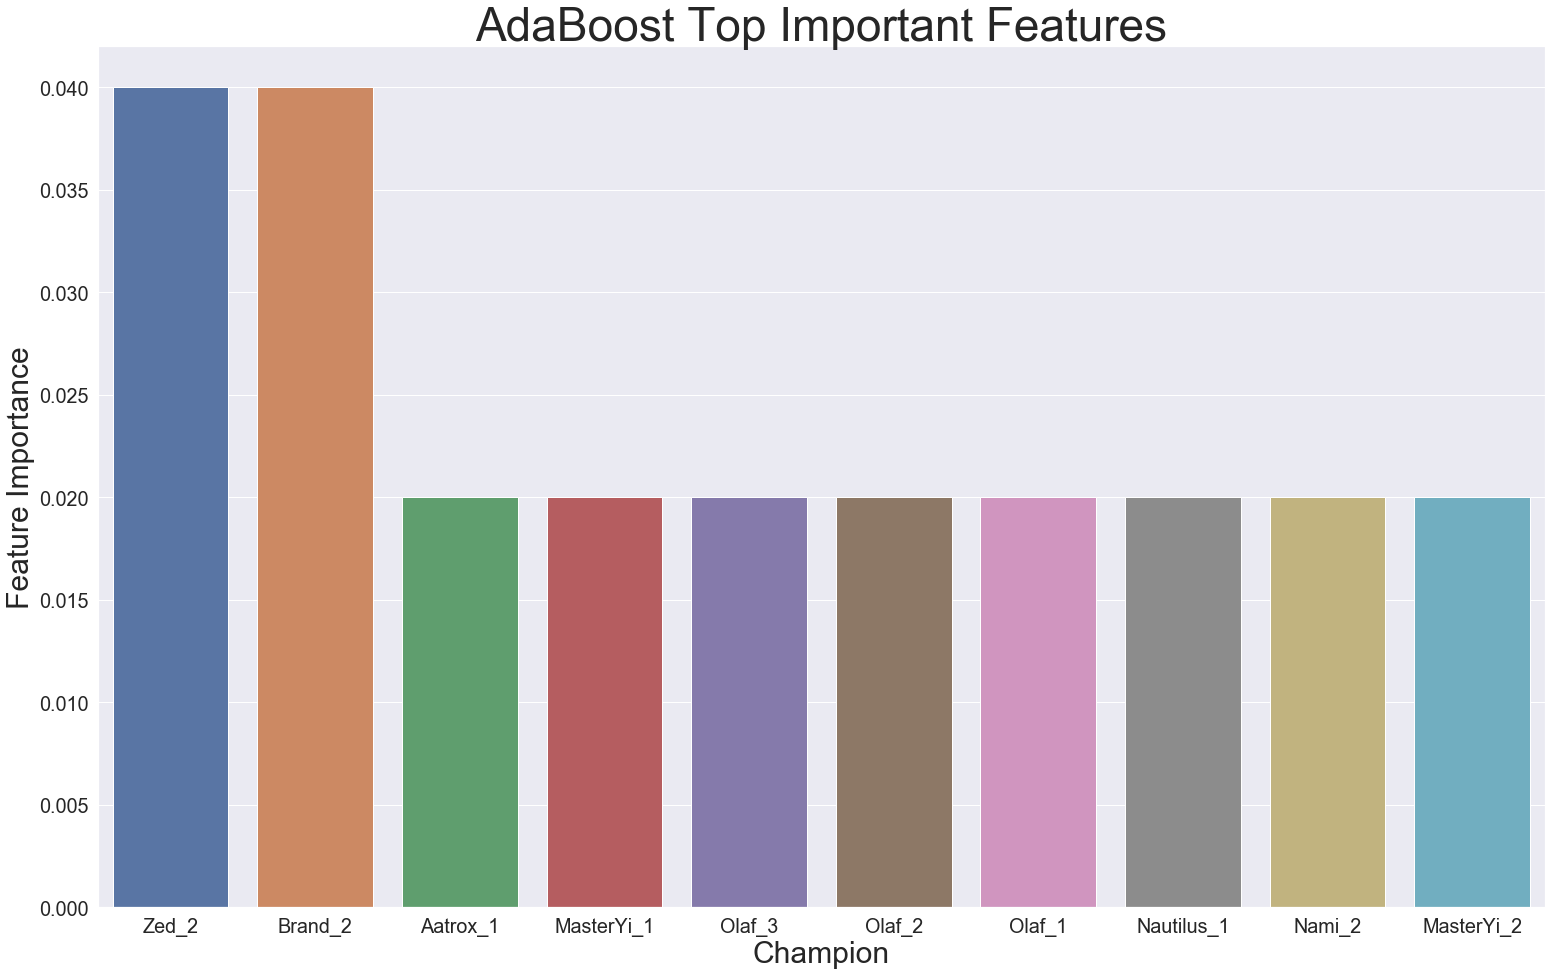

In [27]:
plt.figure(figsize = (22,14))
sns.set_style("whitegrid")
sns.set(font_scale = 1.8)

ada_features_ax = sns.barplot(data=important_features_ada_df_list.head(10),x='champion',y='importance')
ada_features_ax.set_xlabel("Champion",fontsize=30)
ada_features_ax.set_ylabel("Feature Importance",fontsize=30)
plt.title('AdaBoost Top Important Features',fontsize = 46)
plt.tight_layout()

plt.savefig('../plots/adaboost_important_features.png')

#### XGBoost

In [28]:
important_features_xgb = pd.DataFrame(list(xgb_champ.feature_importances_), columns = ['importance'], index = X_champ.columns)

In [29]:
important_features_xgb['importance'].sort_values(ascending=False)

Taric_2       0.017378
Avatar_1      0.015239
Brand_3       0.014818
MasterYi_2    0.014470
Zed_2         0.012629
                ...   
Ivern_1       0.001670
Annie_3       0.000000
Ashe_3        0.000000
Lucian_3      0.000000
Khazix_3      0.000000
Name: importance, Length: 151, dtype: float64

## Optimization using GridSearchCV

### Decision Trees

In [30]:
dtc_params = {'max_depth' : [25], # 15,20,25,30,35,40
              'min_samples_leaf' : [1,2,3],
              'max_features' : [None,50,100,150]}

gs_dtc = GridSearchCV(dtc_champ, param_grid = dtc_params, cv = 5)
gs_dtc.fit(X_train_champ, y_train_champ)
gs_dtc.best_params_

{'max_depth': 25, 'max_features': 100, 'min_samples_leaf': 2}

In [31]:
dtc_best = DecisionTreeClassifier(max_depth=25,
                                  min_samples_leaf=1,
                                  random_state =42)
dtc_best.fit(X_train_champ,y_train_champ)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [32]:
print(f'Decision Tree Train Score: {dtc_best.score(X_train_champ, y_train_champ)}')
print(f'Decision Tree Test Score: {dtc_best.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')

Decision Tree Train Score: 0.7015415718979024
Decision Tree Test Score: 0.24260803639120546
---------------------------------------------


### Random Forest

In [46]:
rfc_params = {'max_features' : [25,50,75],
              'max_depth' : [10,20,35], 
              'n_estimators' : [50],
              'max_leaf_nodes' : [None,2],
              'min_samples_leaf' : [1,2,3]}

gs_rfc = GridSearchCV(rfc_champ, param_grid = rfc_params, cv = 5)
gs_rfc.fit(X_train_champ, y_train_champ)
gs_rfc.best_params_

{'max_depth': 20,
 'max_features': 25,
 'max_leaf_nodes': None,
 'min_samples_leaf': 2,
 'n_estimators': 50}

In [47]:
rfc_best = rfc_params

In [48]:
rfc_best = RandomForestClassifier(max_depth=20, 
                         max_features = 50,
                         n_estimators=50,
                         min_samples_leaf=2,
                         random_state =42)
rfc_best.fit(X_train_champ,y_train_champ)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=50,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [49]:

print(f'Random Forest Train Score: {rfc_best.score(X_train_champ, y_train_champ)}')
print(f'Random Forest Test Score: {rfc_best.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')

Random Forest Train Score: 0.7055850391710892
Random Forest Test Score: 0.2441243366186505
---------------------------------------------


In [50]:
important_features_rfc = pd.DataFrame(list(rfc_champ.feature_importances_), columns = ['importance'], index = X_champ.columns)

In [51]:
important_features_rfc['importance'].sort_values(ascending=False)

Braum_2       0.018982
Taric_1       0.018611
Qiyana_2      0.016357
Kindred_2     0.016225
Nautilus_2    0.016215
                ...   
Lucian_3      0.000337
Ashe_3        0.000224
Twitch_3      0.000156
Annie_3       0.000061
Khazix_3      0.000039
Name: importance, Length: 151, dtype: float64

### XGBoost

In [58]:
xgb_params = {'max_depth' : [6], # 4,5,6
              'n_estimators' : [25], # 10,15,20,25
              'learning_rate' : [0.25, 0.5, 0.75, 1],
              'gamma': [0.2, 0.5, 1]} # 0,1,5

gs_xgb = GridSearchCV(xgb_champ, param_grid = xgb_params, cv = 5)
gs_xgb.fit(X_train_champ, y_train_champ)
gs_xgb.best_params_

{'gamma': 1, 'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 25}

In [53]:
xgb_best = XGBClassifier(max_depth=6, 
                         n_estimators=25,
                         gamma=1,
                         random_state =42)
xgb_best.fit(X_train_champ,y_train_champ)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [54]:

print(f'XGBoost Train Score: {xgb_best.score(X_train_champ, y_train_champ)}')
print(f'XGBoost Test Score: {xgb_best.score(X_test_champ, y_test_champ)}')
print('---------------------------------------------')

XGBoost Train Score: 0.5029062421026029
XGBoost Test Score: 0.2562547384382108
---------------------------------------------


# Conclusion

After we have optimized our model by tuning the hyper parameters of our models, we found that our AdaBoost can predict the placement of a player at approximately 26.76% accuracy.  This at first seemed like a low value; however, when compared to our baseline score of 0.146, our AdaBoost accuracy score of 26.76% is actually performing far better at predicting placement of a player when using champion units data.  It was a bit of a surprise to notice XGBoost not have the best results since it's informally known to dominate kaggle competitions with excellent results.  This could be due to incorrect hyperparameter tuning or due to our data not being informative enough.


By extracting the important features according to our AdaBoost model, it was also evident that Zed (tier 2) and Brand (tier 2) had the most importance in determining a player's outcome of a match.  In the beginning, this project was set out to look for a way to predict an outcome of an 8 player free for all game through understanding the "popular winning strategy".  However, we can infer a slightly different meaning towards such a question.  Zed and Brand are both champion units that are available for players who make it to the later parts of the stage (you need to be higher level to have a chance at obtaining these units which means you cannot be knocked out early).  As a result, it would be impossible for someone with low placement score to have these units.  In the end, "popular" winning strategies had no other significance because the information was shared across all players and every player sought to reach for these units.  It was actually the units that are not "played often" but when they do, they can be good indications rather than potentially the popular "Good" champion units.  
